# ALGORITMOS NO SUPERVISADOS
K-MEANS E HIERARCHICAL CLUSTERING


ELABORADO POR: EDUARDO DAZA

Para la elaboracion de este trabajo haremos uso del conjunto de datos se creó únicamente con el propósito de aprender los conceptos de segmentación de clientes, también conocidos como análisis de la cesta de la compra. Lo demostraré utilizando la técnica de aprendizaje automático no supervisado (algoritmo de agrupamiento KMeans).

Fuente: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

OBJETIVOS:

Con el dataset anterior diseñar los modelos de Clustering (agrupación): K-means e hierarchical clustering. Para cada 
algoritmo realizar los siguientes pasos: 
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.  
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.  
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 
4. Entrenar el modelo configurando los diferentes hiperparámetros. 
5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. 
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo 
7. Interpretar, analizar y documentar los resultados obtenidos.  

# K -  MEANS

In [65]:
# Cargar las librerías necesarias
import pandas as pd  # Manejo y análisis de estructuras de datos
import numpy as np  # Cálculo numérico y análisis de datos
import seaborn as sns  # Creación de gráficos estadísticos
import matplotlib.pyplot as plt  # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go  # Creación de gráficos en tres dimensiones
import plotly.express as px  # Creación de gráficos en tres dimensiones

# Librerías para implementar modelos de clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Librerías para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn import metrics

# Librerías para análisis jerárquico
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

# Librería para evitar advertencias
import warnings
warnings.filterwarnings('ignore')


In [66]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Mall_Customers.csv')
Datos.head(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [67]:
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

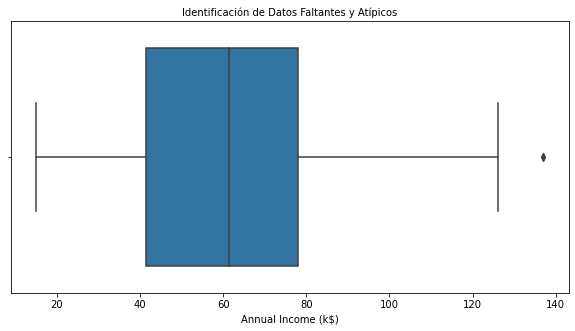

In [68]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(10, 5))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en la edad')

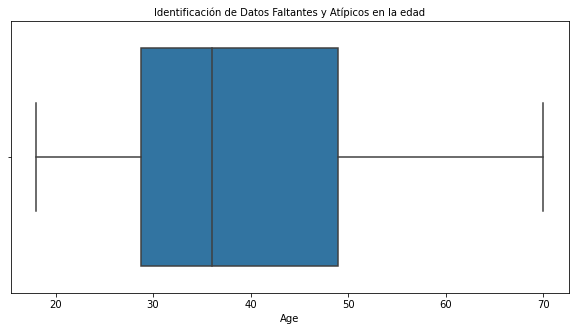

In [69]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(10, 5))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos en la edad', fontsize=10 )

In [70]:
#Revisión de datos faltantes


Datos.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [71]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


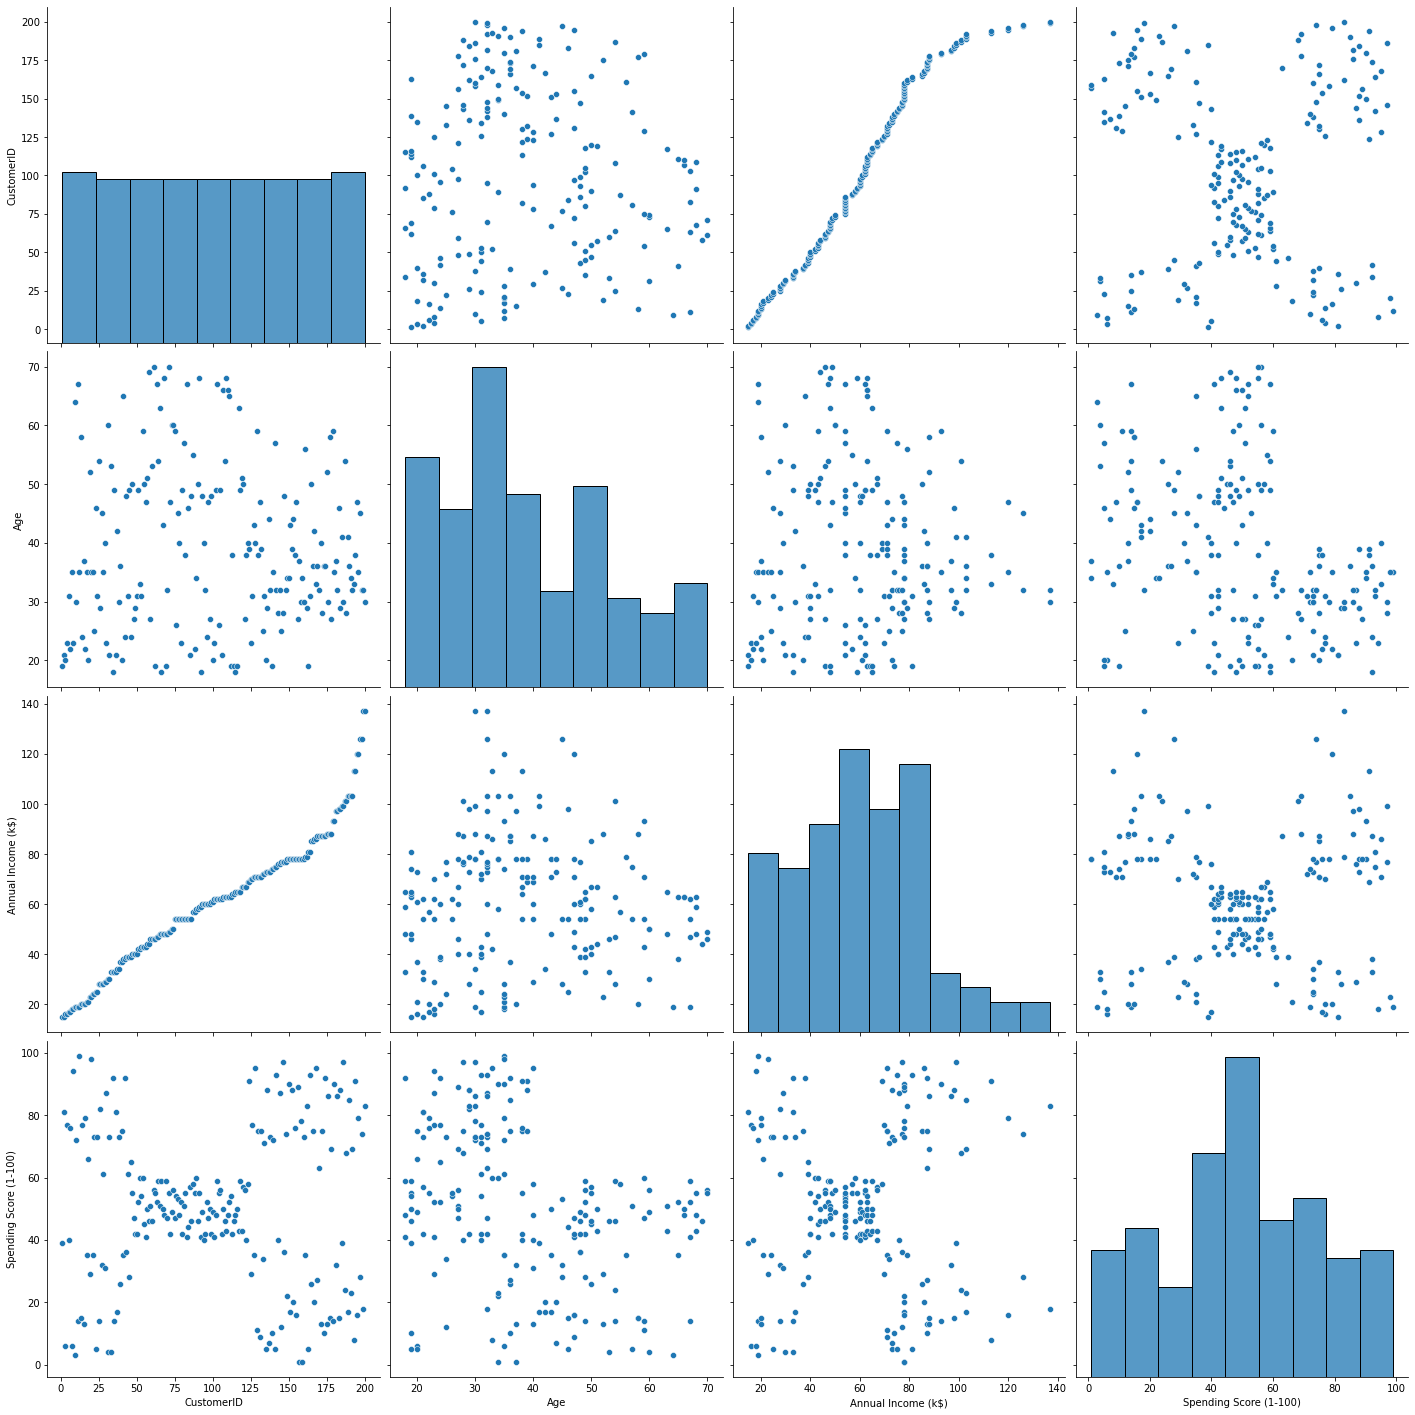

In [72]:
sns.pairplot(Datos.dropna(), size=5,kind='scatter')

In [73]:
# Filtrar columnas del modelo 

Datos = Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [74]:
# Revisión de los datos de las variables objetivo

Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


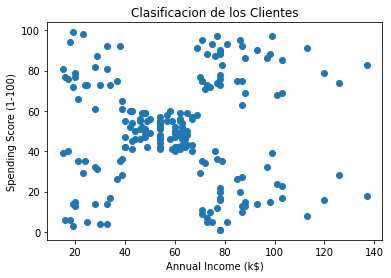

In [75]:
# Grafica antes del agrupamiento

plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clasificacion de los Clientes')
plt.show()

In [76]:

# Matriz de correlación
corr_matrix = Datos.corr()
corr_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [77]:
# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(Datos), columns = Datos.columns)
X

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


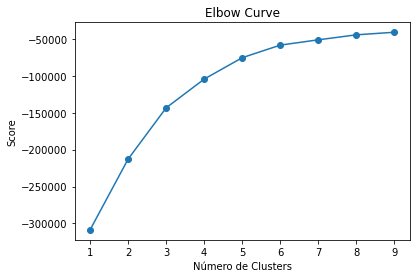

In [85]:
#Se realiza gráfica de codo para identificar valor de K


Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [117]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 5 grupos de agrupamiento) 


Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=5, random_state=0)

In [118]:

#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
Datos["Grupo"] = Modelo.labels_ 
print (Datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      0
1     21                  15                      81      4
2     20                  16                       6      0
3     23                  16                      77      4
4     31                  17                      40      0
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


In [123]:

# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score],
    ["Inertia",kmeans.inertia_]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         200         |
|  Coeficiente Silhouette  | 0.44428597560893024 |
| Indice Calinski Harabasz | 151.04386000160667  |
|  Indice Davies Bouldin   | 0.8218781633199782  |
|         Inertia          | 143342.75157170597  |
+--------------------------+---------------------+


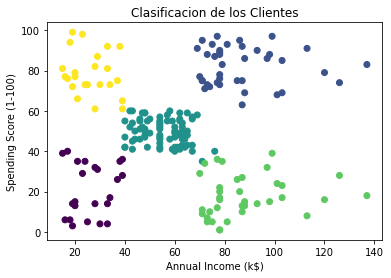

In [124]:
# grafica que permite visualizasr los resultados del modelo
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], c=Datos['Grupo'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clasificacion de los Clientes')
plt.show()

In [125]:

# Crear un modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(Datos, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Grupo', symbol='Grupo', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={5}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 

# Hierarchical clustering

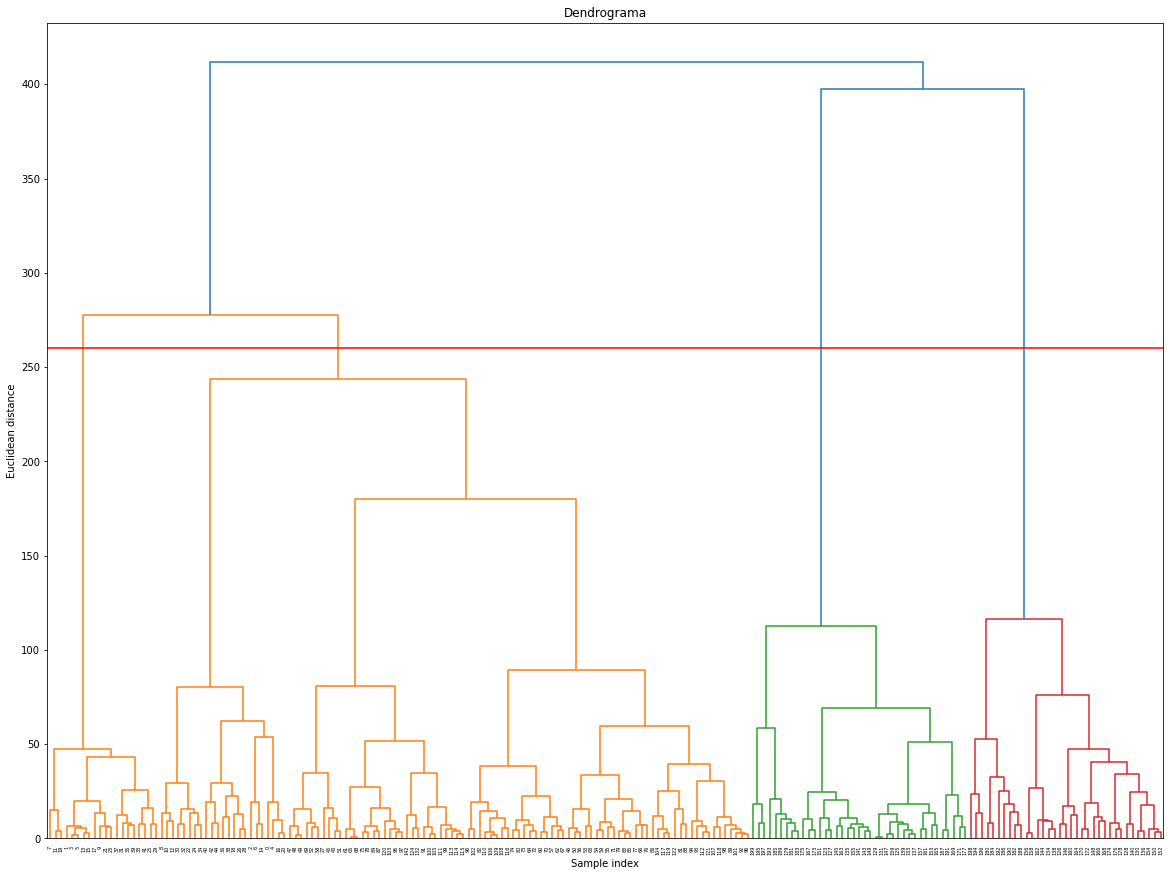

In [142]:
# "Generación de un Dendrograma utilizando el Método de Ward"

ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 15))
dendrogram(ward_clustering)
plt.axhline(y = 260, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [174]:
# Implementación de Clustering Jerárquico con AgglomerativeClustering

hier_clustering = AgglomerativeClustering(n_clusters=5)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [175]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan','blue','purple']
asignar=[]
for row in labels:
    asignar.append(colores[row])

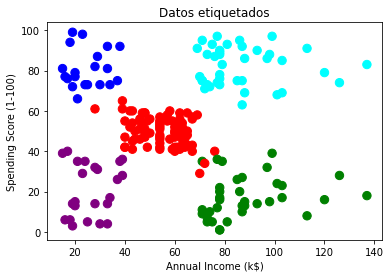

In [176]:
# "Visualización de Datos Etiquetados en un Diagrama de Dispersión"

f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

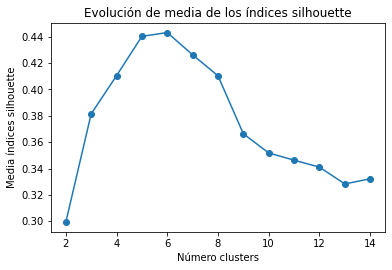

In [177]:

# Método silhouette para identificar el número óptimo de clusters

range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [178]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.4401889024290193
Índice de Calinski-Harabasz: 147.67241343835425
Davies-Bouldin Index: 0.8216721951598938


In [182]:

hier_clustering = AgglomerativeClustering(n_clusters=5)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [183]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.4401889024290193
Índice de Calinski-Harabasz: 147.67241343835425
Davies-Bouldin Index: 0.8216721951598938


In [184]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.66866802140347, array([277.42153431,  53.60747993, 277.42153431, ..., 397.74740753,
        18.27566688, 397.74740753]))


A continuación, se presenta un resumen de los resultados obtenidos y las conclusiones clave del análisis de clustering utilizando los métodos de **K-Means** y **Clustering Jerárquico**:

---

### **Informe sobre la Evaluación de Clustering: K-Means vs. Clustering Jerárquico**

Se realizó un análisis comparativo entre los métodos de **K-Means** y **Clustering Jerárquico** utilizando diversas métricas de calidad para evaluar el desempeño de ambos enfoques en la segmentación de los datos. A continuación, se presentan las principales conclusiones obtenidas a partir de los resultados de las métricas de evaluación.

#### **K-Means:**
- **Puntaje de Silueta:** El valor obtenido fue de **0.444**, lo que indica que los clusters generados por **K-Means** tienen una separación moderada. Este valor es levemente superior al obtenido por **Clustering Jerárquico** (0.44), lo que sugiere que **K-Means** ha logrado una segmentación ligeramente más coherente.
- **Índice de Calinski-Harabasz:** Con un valor de **151.04**, este índice sugiere que **K-Means** ha logrado una buena separación y cohesión dentro de los clusters. Este resultado es algo superior al de **Clustering Jerárquico** (147.67), lo que resalta la capacidad de **K-Means** para formar clusters más compactos y mejor diferenciados.
- **Índice Davies-Bouldin:** El índice de **0.82** es prácticamente el mismo que el de **Clustering Jerárquico**, lo que indica que la separación entre los clusters es similar en ambos métodos.
- **Inercia:** La **inercia** es de **143342.75**, lo que refleja una dispersión significativa dentro de los clusters. Aunque los clusters no son completamente compactos, este valor proporciona información sobre la variabilidad dentro de los grupos formados.

#### **Clustering Jerárquico:**
- **Puntaje de Silueta:** El valor obtenido fue de **0.440**, lo que también refleja una separación moderada entre los clusters. Aunque ligeramente inferior al de **K-Means**, sigue siendo un indicativo de que los clusters están razonablemente definidos, aunque no de manera óptima.
- **Índice de Calinski-Harabasz:** Con un valor de **147.67**, este índice muestra que los clusters generados por **Clustering Jerárquico** tienen una buena calidad en términos de separación y cohesión, aunque **K-Means** logró una puntuación algo superior en este aspecto.
- **Índice Davies-Bouldin:** El valor de **0.821** es prácticamente el mismo que el obtenido para **K-Means**, lo que sugiere una separación similar entre los clusters en ambos métodos.
- **Coeficiente de Correlación Cofenética:** Un coeficiente de 0.6687 sugiere que el Clustering Jerárquico ha generado clusters que mantienen una relación razonable con las distancias originales. Sin embargo, la calidad del agrupamiento podría mejorar, ya que la correlación no es lo suficientemente fuerte como para asegurar una coincidencia perfecta entre las distancias originales y las distancias de los clusters.

  
  
  
#### **Comparación y Conclusiones Generales:**
1. Ambos métodos muestran un rendimiento relativamente similar en términos de **separación de clusters** y **compactación**. Sin embargo, **K-Means** presenta una ligera ventaja sobre **Clustering Jerárquico** en el **Índice de Calinski-Harabasz** y en el **Puntaje de Silueta**, lo que indica una segmentación algo más coherente y una mayor separación entre los grupos.
2. En cuanto al **Índice Davies-Bouldin**, los valores son casi idénticos para ambos métodos, lo que sugiere que la **separación** entre los clusters es comparable en ambos casos.
3. La **Inercia** de **K-Means** es relativamente alta, lo que sugiere que los clusters no están completamente compactos. Este aspecto podría mejorarse con la optimización del número de clusters o la implementación de técnicas de preprocesamiento adicionales.
4. En resumen, **K-Means** parece ser ligeramente más efectivo en términos de separación y cohesión de los clusters, mientras que **Clustering Jerárquico** ofrece una segmentación igualmente válida pero con un rendimiento ligeramente inferior en algunas métricas clave.

Este análisis muestra que ambos métodos son válidos para la segmentación de los datos, pero la elección entre uno u otro podría depender de las características específicas del conjunto de datos y de las necesidades particulares de la segmentación.
